##### Import Libraries

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D,Dropout
from keras.optimizers import Adam
from keras.models import Sequential
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow.python'

#### Image to Pixels

In [48]:
# Path to the main flower dataset folder
dataset_folder = 'flowers'

# List of class names
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Load and preprocess images
data = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)


In [49]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [50]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (2762, 32, 32, 3)
y_train shape: (2762,)
x_val shape (691, 32, 32, 3)
y_val shape : (691,)
x_test shape: (864, 32, 32, 3)
y_test shape: (864,)


In [51]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [52]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

#### Techniques to Improve Accuracy

In [53]:
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

#### CNN 

In [58]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(5,activation='softmax'),
    ]
)
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_11 (Ba  (None, 16, 16, 256)      

#### Train Model

In [67]:
history = customModel.fit(
    x_train,y_train,
    epochs=1,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])

# history.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# customModel.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

87/87 [==============================] - 72s 829ms/step - loss: 0.2011 - accuracy: 0.9356 - val_loss: 1.2591 - val_accuracy: 0.6831


#### Validation Accuracy

In [68]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

22/22 [==============================] - 4s 174ms/step - loss: 1.2591 - accuracy: 0.6831
Validation accuracy :  0.683068037033081


#### Test Accuracy

In [69]:
score = customModel.evaluate(x_test, y_test)

27/27 [==============================] - 5s 174ms/step - loss: 1.2772 - accuracy: 0.6852


In [70]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.277178406715393
Test accuracy: 0.6851851940155029


#### Training Accuracy v/s Validation Accuracy

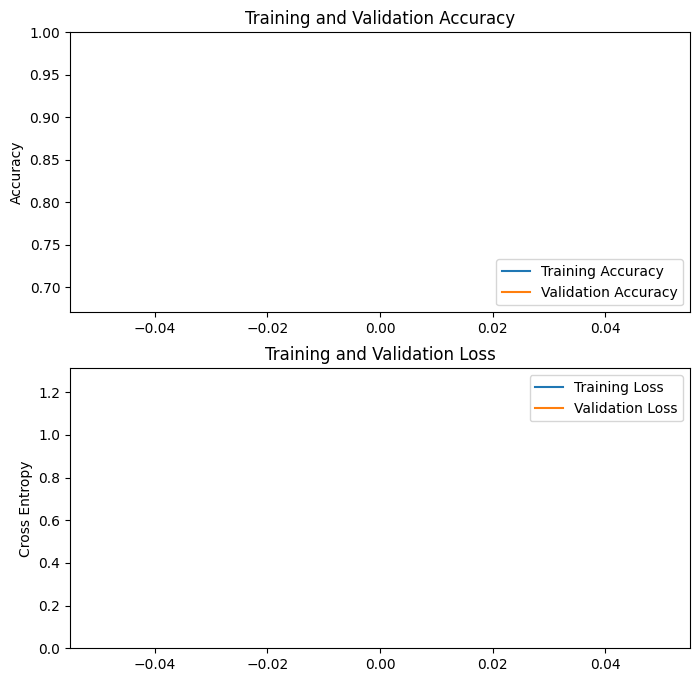

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

#### Confusion Matrix

In [29]:
import pandas as pd
import seaborn as sns

22/22 [==============================] - 4s 155ms/step


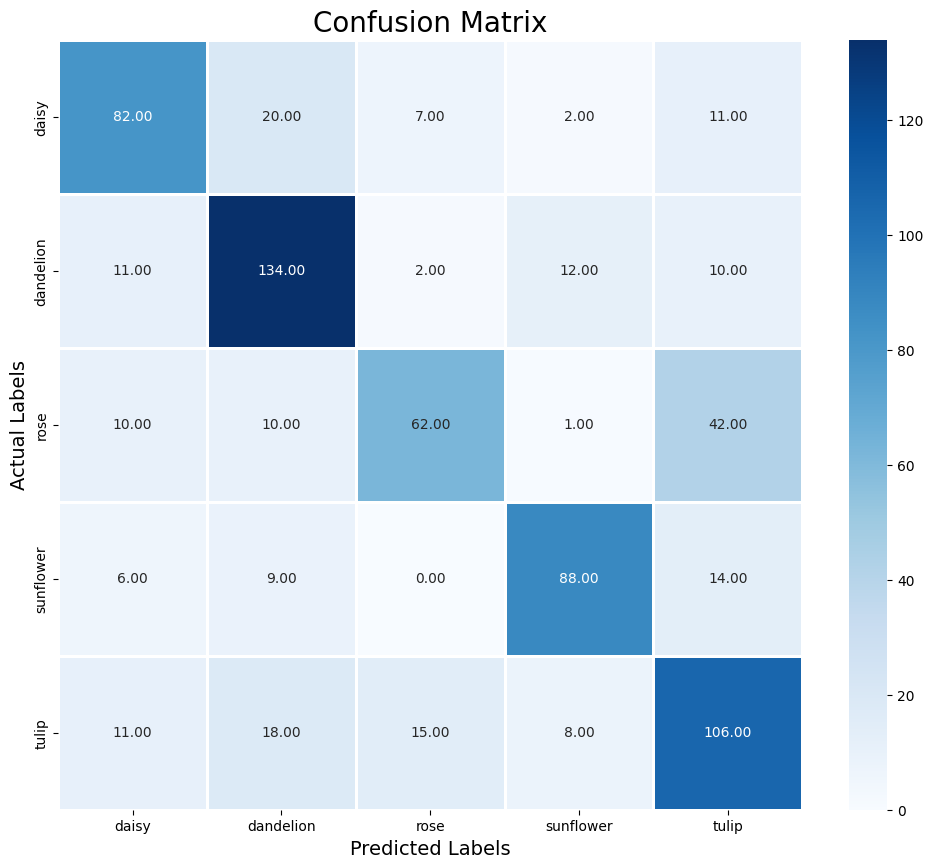

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       122
           1       0.70      0.79      0.74       169
           2       0.72      0.50      0.59       125
           3       0.79      0.75      0.77       117
           4       0.58      0.67      0.62       158

    accuracy                           0.68       691
   macro avg       0.70      0.68      0.68       691
weighted avg       0.69      0.68      0.68       691



In [73]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

#### Save Model

In [74]:
customModel.save('Saved_Model')

INFO:tensorflow:Assets written to: Saved_Model\assets


INFO:tensorflow:Assets written to: Saved_Model\assets


#### Load Model

In [75]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Saved_Model')


#### Predict Image

In [77]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [78]:
# Class names 
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [79]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 215ms/step
Predicted class: rose


#### Tunner

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [272]:
print(tf.__version__)

2.13.0


In [309]:
y_train = np.argmax(y_train, axis=1)

In [310]:
y_train

array([0, 1, 0, ..., 4, 3, 1], dtype=int64)

In [369]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3),
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
    ),
    keras.layers.Dense(5, activation='softmax')
  ])
  
  model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
  
  return model

In [370]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [371]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Tunner")

In [375]:
y_train.shape

(2762,)

In [372]:
tuner_search.search(x_train,y_train,epochs=7,validation_split=0.1)

Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |64                |conv_1_filter
5                 |5                 |conv_1_kernel
32                |32                |conv_2_filter
3                 |5                 |conv_2_kernel
48                |128               |dense_1_units

Epoch 1/7


Traceback (most recent call last):
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwa

RuntimeError: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras_tuner\engine\hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VAIBHAV\AppData\Local\Temp\__autograph_generated_fileibr0m4oc.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible



In [345]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 112)       8512      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 112)       448       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 112)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        48432     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 48)        192       
 chNormalization)                                                
                                                        

In [347]:
# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [348]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (2762, 32, 32, 3)
y_train shape: (2762,)
x_val shape (691, 32, 32, 3)
y_val shape : (691,)
x_test shape: (864, 32, 32, 3)
y_test shape: (864,)


In [349]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [350]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

In [351]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

In [352]:
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [365]:
y_train = np.argmax(y_train, axis=1)
y_train

array([0, 1, 0, ..., 4, 3, 1], dtype=int64)

In [364]:
y_val = np.argmax(y_val, axis=1)
y_val

array([1, 3, 3, 0, 2, 2, 1, 3, 3, 1, 0, 3, 3, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       4, 0, 1, 3, 2, 0, 0, 3, 3, 4, 1, 4, 4, 0, 2, 2, 1, 1, 1, 1, 4, 0,
       0, 4, 2, 2, 2, 4, 1, 0, 1, 3, 4, 3, 3, 4, 1, 4, 1, 2, 1, 1, 3, 0,
       1, 2, 4, 3, 4, 3, 2, 3, 1, 0, 1, 4, 2, 4, 0, 1, 0, 2, 2, 4, 4, 0,
       2, 3, 0, 2, 1, 4, 0, 1, 4, 3, 1, 2, 4, 0, 1, 3, 1, 2, 3, 2, 1, 1,
       1, 0, 0, 3, 2, 1, 3, 3, 0, 2, 1, 2, 2, 0, 1, 4, 1, 3, 0, 0, 4, 2,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 3, 4, 1, 1, 3, 1, 2, 2, 2, 0, 2, 1, 4,
       4, 3, 3, 2, 1, 3, 2, 1, 2, 1, 4, 4, 1, 0, 4, 0, 4, 2, 4, 2, 4, 3,
       0, 1, 1, 0, 1, 0, 3, 4, 2, 1, 1, 4, 3, 3, 0, 1, 1, 3, 2, 3, 2, 0,
       1, 1, 2, 3, 2, 0, 0, 2, 1, 1, 1, 4, 2, 1, 4, 0, 1, 2, 2, 1, 2, 2,
       3, 3, 4, 3, 4, 3, 4, 3, 1, 0, 1, 1, 1, 4, 2, 4, 1, 0, 4, 4, 1, 1,
       1, 0, 4, 4, 2, 3, 3, 1, 2, 0, 2, 2, 0, 4, 2, 4, 0, 1, 0, 0, 3, 1,
       4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 0, 3, 2, 1, 1, 4, 4, 2, 4,
       4, 3, 3, 3, 1, 0, 4, 3, 0, 0, 4, 1, 4, 2, 3,

In [366]:
history = model.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])

# history.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# customModel.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/35
86/87 [============================>.] - ETA: 0s - loss: 0.4606 - accuracy: 0.1704WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 10s 100ms/step - loss: 0.4602 - accuracy: 0.1709 - val_loss: 1.2713 - val_accuracy: 0.1563
Epoch 2/35
86/87 [============================>.] - ETA: 0s - loss: 0.3645 - accuracy: 0.1693WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 108ms/step - loss: 0.3663 - accuracy: 0.1687 - val_loss: 1.3837 - val_accuracy: 0.2055
Epoch 3/35
86/87 [============================>.] - ETA: 0s - loss: 0.2767 - accuracy: 0.1708WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 100ms/step - loss: 0.2778 - accuracy: 0.1705 - val_loss: 1.3514 - val_accuracy: 0.1664
Epoch 4/35
86/87 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.1755WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 103ms/step - loss: 0.1818 - accuracy: 0.1752 - val_loss: 1.3507 - val_accuracy: 0.2113
Epoch 5/35
86/87 [============================>.] - ETA: 0s - loss: 0.1268 - accuracy: 0.1741WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 102ms/step - loss: 0.1289 - accuracy: 0.1738 - val_loss: 1.6775 - val_accuracy: 0.0680
Epoch 6/35
86/87 [============================>.] - ETA: 0s - loss: 0.1069 - accuracy: 0.1751WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 104ms/step - loss: 0.1073 - accuracy: 0.1752 - val_loss: 1.5627 - val_accuracy: 0.1867
Epoch 7/35
87/87 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.1767WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 11s 127ms/step - loss: 0.0835 - accuracy: 0.1767 - val_loss: 1.4762 - val_accuracy: 0.1462
Epoch 8/35
86/87 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.1770WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 12s 140ms/step - loss: 0.0568 - accuracy: 0.1767 - val_loss: 1.7886 - val_accuracy: 0.1433
Epoch 9/35
86/87 [============================>.] - ETA: 0s - loss: 0.0328 - accuracy: 0.1770WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 12s 136ms/step - loss: 0.0332 - accuracy: 0.1767 - val_loss: 1.7181 - val_accuracy: 0.1939
Epoch 10/35
86/87 [============================>.] - ETA: 0s - loss: 0.0367 - accuracy: 0.1755WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 10s 111ms/step - loss: 0.0382 - accuracy: 0.1756 - val_loss: 1.6549 - val_accuracy: 0.1939
Epoch 11/35
87/87 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.1778WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 107ms/step - loss: 0.0638 - accuracy: 0.1778 - val_loss: 1.8614 - val_accuracy: 0.2576
Epoch 12/35
86/87 [============================>.] - ETA: 0s - loss: 0.0868 - accuracy: 0.1777WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 11s 132ms/step - loss: 0.0865 - accuracy: 0.1774 - val_loss: 2.0032 - val_accuracy: 0.1187
Epoch 13/35
86/87 [============================>.] - ETA: 0s - loss: 0.0652 - accuracy: 0.1781WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 10s 117ms/step - loss: 0.0654 - accuracy: 0.1785 - val_loss: 1.8380 - val_accuracy: 0.2156
Epoch 14/35
86/87 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.1770WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 8s 96ms/step - loss: 0.0697 - accuracy: 0.1763 - val_loss: 2.4195 - val_accuracy: 0.1346
Epoch 15/35
86/87 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.1784WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 101ms/step - loss: 0.0505 - accuracy: 0.1785 - val_loss: 1.8413 - val_accuracy: 0.1520
Epoch 16/35
86/87 [============================>.] - ETA: 0s - loss: 0.0679 - accuracy: 0.1773WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 10s 117ms/step - loss: 0.0679 - accuracy: 0.1767 - val_loss: 1.9206 - val_accuracy: 0.1968
Epoch 17/35
86/87 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.1748WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 109ms/step - loss: 0.0775 - accuracy: 0.1749 - val_loss: 2.4999 - val_accuracy: 0.3763
Epoch 18/35
86/87 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.1770WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 10s 110ms/step - loss: 0.0676 - accuracy: 0.1767 - val_loss: 1.8577 - val_accuracy: 0.1577
Epoch 19/35
86/87 [============================>.] - ETA: 0s - loss: 0.1027 - accuracy: 0.1784WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 10s 112ms/step - loss: 0.1028 - accuracy: 0.1781 - val_loss: 2.1682 - val_accuracy: 0.1360
Epoch 20/35
86/87 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.1777WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 9s 104ms/step - loss: 0.0803 - accuracy: 0.1774 - val_loss: 2.0328 - val_accuracy: 0.1838
Epoch 21/35
69/87 [======================>.......] - ETA: 1s - loss: 0.0352 - accuracy: 0.1757

KeyboardInterrupt: 